<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/04_%C3%81rboles/TensorFlow_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos

In [43]:
%%capture
!pip install tensorflow_decision_forests

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
# Se toman los datos de esta competencia: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


# EDA

In [46]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
df.shape

(1460, 81)

In [47]:
df 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
df = df.drop('Id', axis=1)
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [49]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 900x800 with 0 Axes>

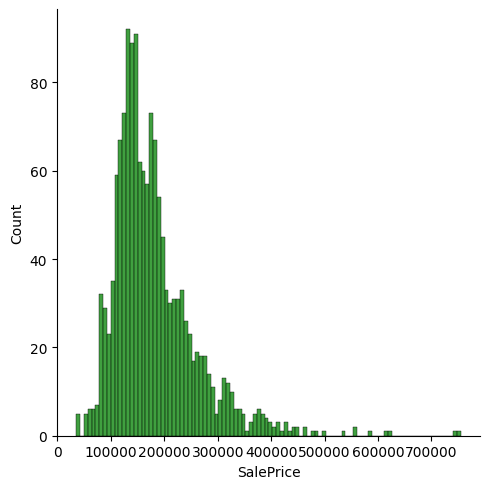

In [50]:
plt.figure(figsize=(9, 8))
sns.displot(df['SalePrice'], color='g', bins=100)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

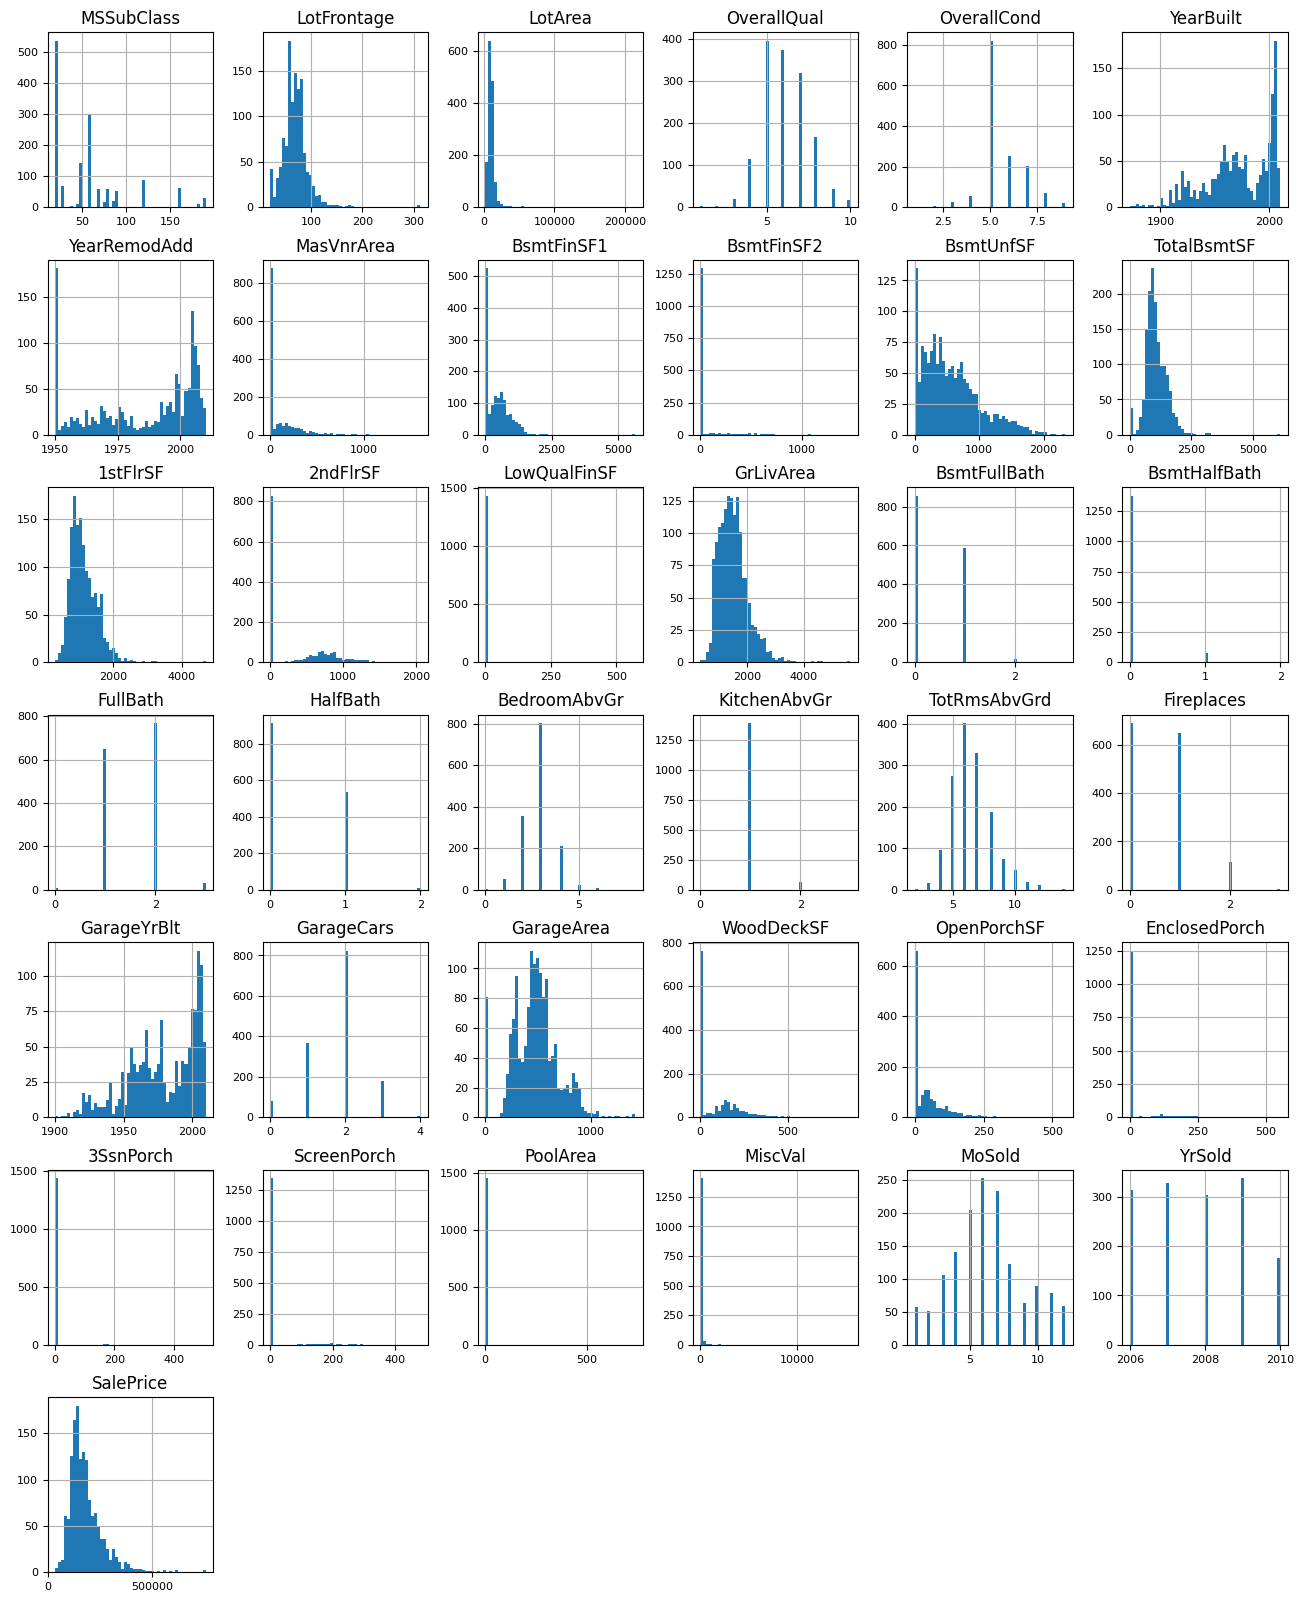

In [51]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Split y Entrenamiento

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, = train_test_split(df, test_size=0.2)

In [53]:
# https://www.tensorflow.org/decision_forests?hl=es-419
import tensorflow_decision_forests as tfdf
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test, label=label, task = tfdf.keras.Task.REGRESSION)

In [54]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [128]:
from keras import backend as K
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [129]:
rf = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["MAE", "MSE", coeff_determination]) 

Use /tmp/tmpk62vwtrm as temporary training directory


In [130]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.009888. Found 1168 examples.
Training model...
Model trained in 0:00:04.004281
Compiling model...
Model compiled.


In [131]:
rf.summary()

Model: "gradient_boosted_trees_model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (79):
	1stFlrSF
	2ndFlrSF
	3SsnPorch
	Alley
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinSF1
	BsmtFinSF2
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtHalfBath
	BsmtQual
	BsmtUnfSF
	CentralAir
	Condition1
	Condition2
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fence
	FireplaceQu
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	Heating
	HeatingQC
	HouseStyle
	KitchenAbvGr
	KitchenQual
	LandContour
	LandSlope
	LotArea
	LotConfig
	LotFrontage
	LotShape
	LowQualFinSF
	M

In [132]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

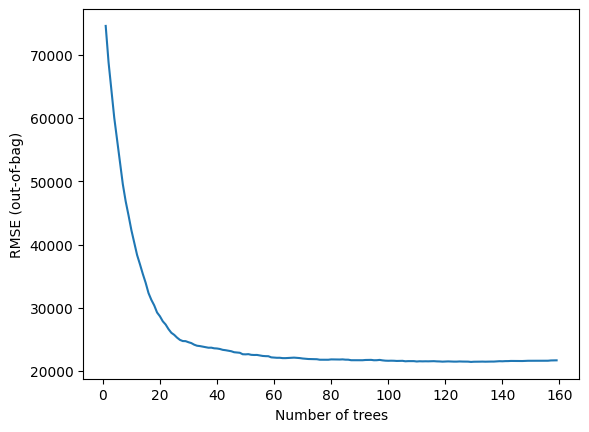

In [133]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [134]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=21440.875, rmse=21440.875, ndcg=None, aucs=None, auuc=None, qini=None)

In [135]:
evaluation = rf.evaluate(x=train_ds,return_dict=True)

evaluation.items()

2/2 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - MAE: 4755.5776 - MSE: 62054876.0000 - coeff_determination: 0.9897


dict_items([('loss', 0.0), ('MAE', 4755.57763671875), ('MSE', 62054876.0), ('coeff_determination', 0.989673376083374)])

In [136]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

evaluation.items()

1/1 [==============================] - 0s 448ms/step - loss: 0.0000e+00 - MAE: 16814.5293 - MSE: 828821824.0000 - coeff_determination: 0.8774


dict_items([('loss', 0.0), ('MAE', 16814.529296875), ('MSE', 828821824.0), ('coeff_determination', 0.877427339553833)])

# Feature Importance

In [71]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE


In [72]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 23.0),
 ("2ndFlrSF" (1; #1), 9.0),
 ("Functional" (4; #30), 8.0),
 ("LotConfig" (4; #48), 8.0),
 ("LotArea" (1; #47), 6.0),
 ("OverallCond" (1; #61), 6.0),
 ("ScreenPorch" (1; #70), 6.0),
 ("GrLivArea" (1; #38), 5.0),
 ("KitchenQual" (4; #44), 5.0),
 ("TotalBsmtSF" (1; #73), 5.0),
 ("BsmtFinSF1" (1; #8), 4.0),
 ("BsmtFinType1" (4; #10), 4.0),
 ("GarageYrBlt" (1; #37), 4.0),
 ("LotFrontage" (1; #49), 4.0),
 ("Neighborhood" (4; #59), 4.0),
 ("1stFlrSF" (1; #0), 3.0),
 ("FullBath" (1; #29), 3.0),
 ("GarageCars" (1; #32), 3.0),
 ("LowQualFinSF" (1; #51), 3.0),
 ("BsmtFinSF2" (1; #9), 2.0),
 ("Fireplaces" (1; #27), 2.0),
 ("GarageArea" (1; #31), 2.0),
 ("OpenPorchSF" (1; #60), 2.0),
 ("YearRemodAdd" (1; #77), 2.0),
 ("Condition1" (4; #17), 1.0),
 ("Exterior1st" (4; #23), 1.0),
 ("HouseStyle" (4; #42), 1.0),
 ("MSZoning" (4; #53), 1.0),
 ("MasVnrArea" (1; #54), 1.0),
 ("YrSold" (1; #78), 1.0)]

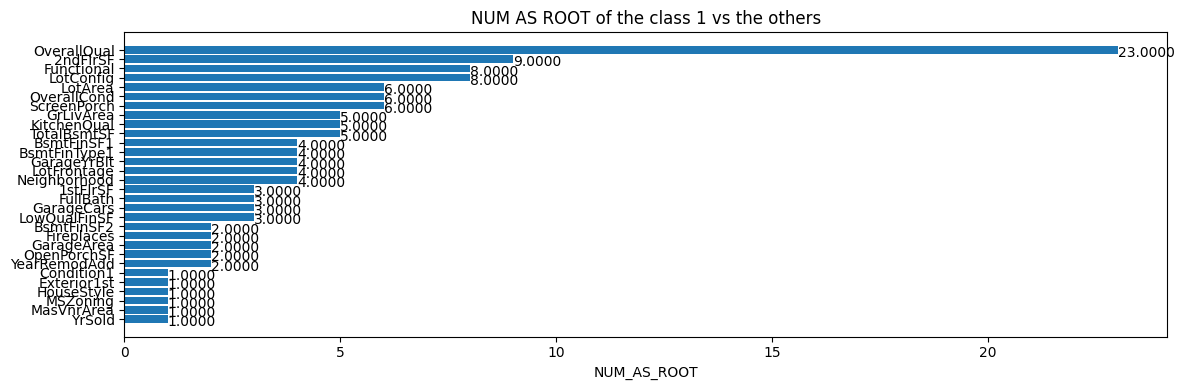

In [73]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# Submission

In [74]:
test_file_path = "/content/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 1s 56ms/step


,Id,SalePrice
0,1461,129692.117188
1,1462,156201.734375
2,1463,180775.687500
3,1464,194567.593750
4,1465,228626.953125


In [75]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/content/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 48ms/step


,Id,SalePrice
0,1461,129692.117188
1,1462,156201.734375
2,1463,180775.687500
3,1464,194567.593750
4,1465,228626.953125
